# Neural Net testing

In [2]:
import numpy as np                                                              
import matplotlib.pyplot as plt
import scipy.stats as st

import neuralNet as nn
import utils as u

## One variable function testing

In [4]:
testFunc = lambda x: np.sum(np.atleast_2d(x), axis=1) % 2

n_max = 1024
nDigs = len(bin(n_max)[2:])
inputs = np.array([[int(i) for i in list(bin(x)[2:].zfill(nDigs))] for x in range(n_max)])
outputs = testFunc(inputs)

sizes = [nDigs, 100, 1]

model = nn.NeuralNet(sizes, **nn.losses['log'], **nn.activations['sigmoid'])

it, E_ins = model.learn(inputs, outputs, maxIters=100, trackE_in=True)

/Users/akshayyeluri/anaconda3/envs/neural/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


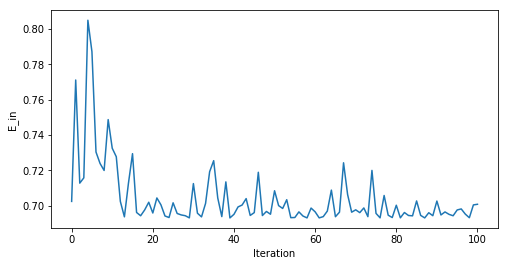

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

u.plotE_ins(E_ins, axis=ax)
#model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

outputs2 = np.round(np.array([model.calculate(i) for i in inputs]))

In [16]:
testFunc = lambda x: np.sin(2 * x)

inputs = np.linspace(-np.pi, np.pi, 200)
outputs = testFunc(inputs)

sizes = [1, 100, 100, 1]

## For cosine, need different nonlinearity
#model = nn.NeuralNet(sizes, **nn.activations['sigmoid'])
model = nn.NeuralNet(sizes, **nn.activations['tanh'])

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

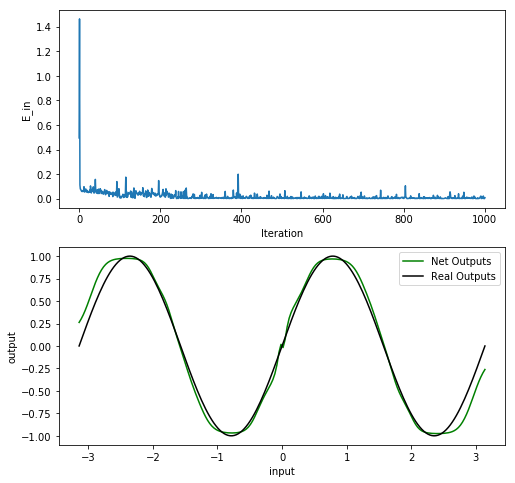

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])
model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

In [18]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
outputs = testFunc(inputs)

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

array([ 0.0189487 ,  0.0073717 , -0.20783784, -0.02830953, -0.10167247,
        0.02104774,  0.08141398,  0.02835962,  0.01137168,  0.02380805,
       -0.07309158, -0.02583535, -0.00705942,  0.01174097,  0.07839415,
        0.03236404, -0.02582906,  0.03010406, -0.01476665,  0.01013914])

## Multi-Variable Function Testing

In [20]:
testFunc = lambda x, y: np.cos(x + y)

inputs = np.linspace(-np.pi / 2, np.pi / 2, 100)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

sizes = [2, 100, 100, 1]

model = nn.NeuralNet(sizes, **nn.activations['sigmoid'])
#model = nn.NeuralNet(sizes)

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

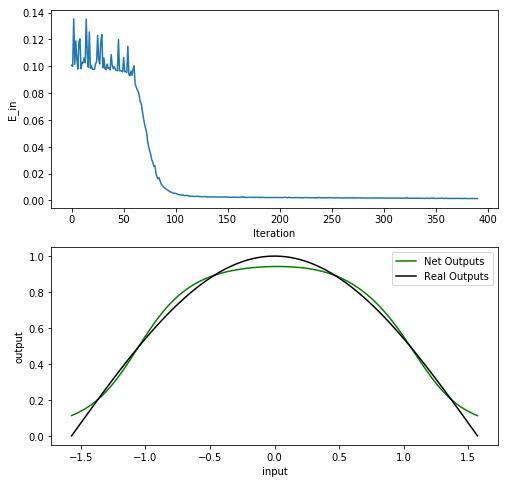

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])

ax[1].plot(np.sum(inputs, axis=1), [model.calculate(i) for i in inputs], color='g', label='Net Outputs')
ax[1].plot(np.sum(inputs, axis=1), outputs, color='k', label='Real Outputs')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')
ax[1].legend()

fig.show()

In [22]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

array([ 0.04199523,  0.71624716, -0.02892037,  0.02992029,  0.65937462,
        0.98313227,  0.49471459,  0.59428184,  1.00971817,  0.70839989,
       -0.01485922,  0.0099888 ,  0.33460071, -0.0255134 ,  0.89414205,
        0.1042544 ,  0.02795734, -0.05437757, -0.02289223, -0.02138176])